In [331]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
p_False_Pos = 0.4
p_False_Neg = 0.4

In [217]:
def get_data_class(label, n, mu, cov, p_mislabel):
    X = np.random.multivariate_normal(mu, cov, size=(n))
    Y = np.ones(n)*label
    Z = np.abs(np.random.binomial(1, 1-p_mislabel, size=n)-1+label)
    
    return X,Y,Z

def get_data(labels, ns, mus, cov, p_mislabels):
    X0,Y0,Z0 = get_data_class(labels[0], ns[0], mus[0], cov, p_mislabels[0])
    X1,Y1,Z1 = get_data_class(labels[1], ns[1], mus[1], cov, p_mislabels[1])
    
    X = np.vstack((X0,X1))
    Y = np.hstack((Y0,Y1))
    Z = np.hstack((Z0,Z1))
    
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    return(X[indices],Y[indices],Z[indices])

In [337]:
mu0 = [-1,0]
mu1 = [1,0]
cov = [[1,0], [0,1]]
mus = [mu0, mu1]
classes = [0, 1]
ns = [100,500,1000,2000,5000,10000]

balanced_err = [0.4,0.4]
unbalanced_err = [0.2, 0.3]

In [270]:
n_test = 1000
X_test, Y_test, _ = get_data([0,1], [n_test, n_test], [[-1,0],[1,0]], cov, [0,0])

In [271]:
X_train_balanced, Y_train_balanced, Z_train_balanced = get_data([0,1], [ns[-1], ns[-1]], [[-1,0],[1,0]], cov, [0.4,0.4])
X_train_unbalanced, Y_train_unbalanced, Z_train_unbalanced = get_data([0,1], [ns[-1], ns[-1]], [[-1,0],[1,0]], cov, [0.2,0.3])

In [325]:
scores_unbalanced = []
scores_balanced = []
#clf = KNeighborsClassifier(n_neighbors=3)
clf_balanced = LinearSVC()
clf_unbalanced = LinearSVC()

for n in ns:
    clf_balanced.fit(X_train_balanced[:n], Z_train_balanced[:n])
    err = np.sum(np.abs(clf_balanced.predict(X_test) - Y_test)) / len(Y_test)
    scores_balanced.append(err)
    
    clf_unbalanced.fit(X_train_unbalanced[:n], Z_train_unbalanced[:n])
    err = np.sum(np.abs(clf_unbalanced.predict(X_test) - Y_test)) / len(Y_test)
    scores_unbalanced.append(err)

Text(0.5, 1.0, 'Balanced vs. Unbalanced Class mislabeling')

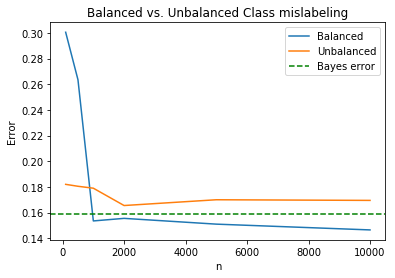

In [339]:
plt.plot(ns, scores_balanced, label='Balanced')
plt.plot(ns, scores_unbalanced, label='Unbalanced')
plt.xlabel('n')
plt.ylabel('Error')
plt.axhline(norm.cdf(-1), c='green', ls='--', label='Bayes error')
plt.legend()
plt.title('Balanced vs. Unbalanced Class mislabeling')

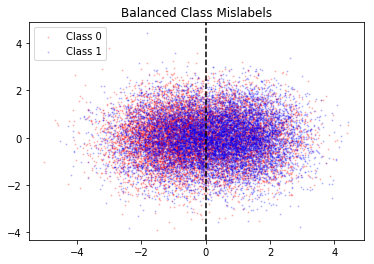

In [327]:
cdict = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
for g in [0,1]:
    ix = np.where(Z_train_balanced == g)[0]
    ax.scatter(X_train_balanced[ix,0], X_train_balanced[ix,1], c = cdict[g], label = g, s=1, alpha=0.2)
ax.legend(['Class 0', 'Class 1'])
ax.axvline(0,c='black',linestyle='--')
plt.title('Balanced Class Mislabels')
plt.show()

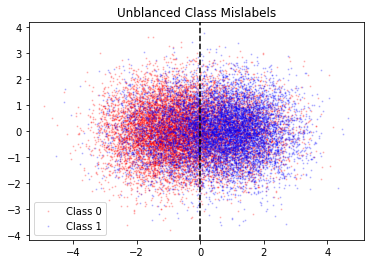

In [328]:
cdict = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
for g in [0,1]:
    ix = np.where(Z_train_unbalanced == g)[0]
    ax.scatter(X_train_unbalanced[ix,0], X_train_unbalanced[ix,1], c = cdict[g], label = g, s=1, alpha=0.2)
ax.legend(['Class 0', 'Class 1'])
ax.axvline(0,c='black',linestyle='--')
plt.title('Unblanced Class Mislabels')
plt.show()

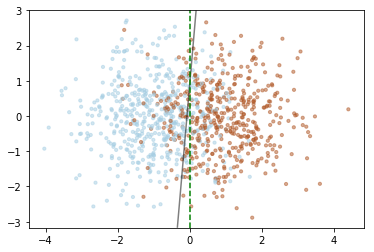

In [329]:
plt.scatter(X_train_balanced[:1000, 0], X_train_balanced[:1000, 1], c=Y_train_balanced[:1000], s=10, cmap=plt.cm.Paired, alpha=0.5)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_balanced.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.axvline(0,c='green',linestyle='--')
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

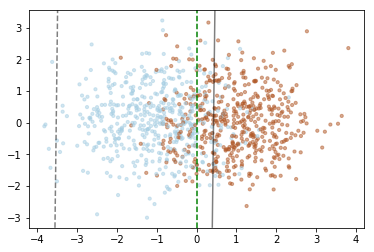

In [330]:
plt.scatter(X_train_unbalanced[:1000, 0], X_train_unbalanced[:1000, 1], c=Y_train_unbalanced[:1000], s=10, cmap=plt.cm.Paired, alpha=0.5)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_unbalanced.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.axvline(0,c='green',linestyle='--')
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none', edgecolors='k')
plt.show()